In [4]:
import operator
from copy import deepcopy
from lsst.afw.math import afwMath
import lsst.afw.image as afwImage
import lsst.daf.persistence as dafPersist
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

import Utils.DiaSourceTools as DSTools

In [46]:
def get_weight( calexp):

    statsCtrl = afwMath.StatisticsControl()
    statsCtrl.setNumSigmaClip(3.0)
    statsCtrl.setNumIter(2)
    statsCtrl.setAndMask(afwImage.MaskU.getPlaneBitMask(['NO_DATA', 'BAD', 'EDGE', 'SAT']))
    statsCtrl.setNanSafe(True)



    maskedImage = calexp.getMaskedImage()
    statObj = afwMath.makeStatistics(maskedImage.getVariance(), maskedImage.getMask(), afwMath.MEANCLIP, statsCtrl)
    meanVar, meanVarErr = statObj.getResult(afwMath.MEANCLIP)
    weight = 1 / float(meanVar)
    return weight

def get_weight2( calexp):

    statsCtrl = afwMath.StatisticsControl()
    statsCtrl.setNumSigmaClip(3.0)
    statsCtrl.setNumIter(2)
    statsCtrl.setAndMask(afwImage.MaskU.getPlaneBitMask(['NO_DATA', 'BAD', 'EDGE', 'SAT', 'DETECTED_NEGATIVE']))
    statsCtrl.setNanSafe(True)



    maskedImage = calexp.getMaskedImage()
    statObj = afwMath.makeStatistics(maskedImage.getVariance(), maskedImage.getMask(), afwMath.MEANCLIP, statsCtrl)
    meanVar, meanVarErr = statObj.getResult(afwMath.MEANCLIP)
    weight = 1 / float(meanVar)
    return weight


In [2]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production/"
butler = dafPersist.Butler(DATADIR+"tests_reroll")
tempexps = butler.subset("deepCoadd_tempExp", dataId={"filter":"r","tract":0, "patch":"5,13", "runId":"05AL01"})

In [40]:
weights = []
for t in tempexps:
    if butler.datasetExists("deepCoadd_tempExp", dataId= t.dataId):
        texp = butler.get("deepCoadd_tempExp", dataId= t.dataId)
        weights.append((get_weight(texp), t.dataId["visit"]))
        

In [45]:
weights.sort()
weights[-15:]

[(0.00674328480555542, 797100),
 (0.006751309970279801, 801148),
 (0.006798852583058229, 792754),
 (0.006837857125144476, 800717),
 (0.007028189362056834, 806142),
 (0.007133541756052006, 802231),
 (0.007179716791181105, 780356),
 (0.0074906074253089485, 788483),
 (0.007513814273186079, 796722),
 (0.007895096106472129, 784515),
 (0.008013138809055697, 781476),
 (0.008061877893205824, 780353),
 (0.008115204673576288, 802228),
 (0.00817716957101046, 801145),
 (0.008432476982252466, 800718)]

In [48]:
weights2 = []
for t in tempexps:
    if butler.datasetExists("deepCoadd_tempExp", dataId= t.dataId):
        texp = butler.get("deepCoadd_tempExp", dataId= t.dataId)
        DSTools.detect_diasources(texp)
        weights2.append((get_weight2(texp), t.dataId["visit"]))
        
weights2.sort()
weights2[-15:]

[(0.0033203328226655707, 801146),
 (0.00335149066715374, 801145),
 (0.0033748042667460713, 780353),
 (0.003388356286228317, 800719),
 (0.003402821730091327, 780354),
 (0.0034029332714720873, 780352),
 (0.0034284684081667873, 780355),
 (0.003429447352292101, 802229),
 (0.0034422067206434396, 802227),
 (0.003447593290044478, 780356),
 (0.003462102707713221, 802228),
 (0.0034693955532114594, 800718),
 (0.0034765777466919633, 800717),
 (0.003476807501274026, 802231),
 (0.0034784383721811617, 802230)]

Struct(sources=<lsst.afw.table.source.source.SourceCatalog object at 0x7ff48a855770>; fpSets=Struct(numPos=73; positive=<lsst.afw.detection._footprintSet.FootprintSet object at 0x7ff48a8413b0>; numNeg=9; negative=<lsst.afw.detection._footprintSet.FootprintSet object at 0x7ff48a841030>; background=None))

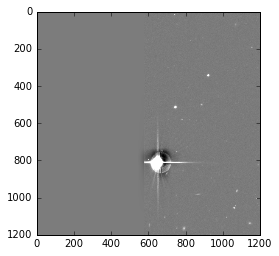

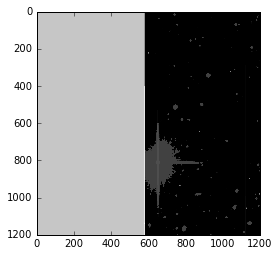

In [10]:
mi = texp.getMaskedImage()
im = mi.getImage()
imarray = im.getArray()
plt.imshow(imarray, cmap="gray", vmin= imarray.mean()-imarray.std(), vmax = imarray.mean()+imarray.std())
plt.show()
plt.imshow(mi.getMask().getArray(), cmap="gray")
plt.show()

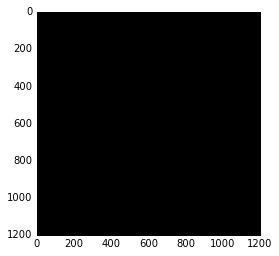

In [30]:
maskarray = mi.getMask().getArray()

ndata = afwImage.MaskU.getPlaneBitMask(['SUSPECT'])

newarray = deepcopy(maskarray)

newarray[newarray & ndata != 0] = 1000

plt.imshow(newarray, vmin=999, vmax=1000, cmap="gray")
plt.show()

In [35]:
get_weight(texp)

0.0034029332714720873

In [37]:
get_weight(texp)

0.0065532240764067575